In [56]:
import numpy as np

# age
a = np.array([13,15,16,18,19,20,20,21,22,22,25,25,25,30,33,33,35,35,36,40,45,46,52,70])
print(len(a) / 3)   # 多少箱

8.0


In [57]:

# 使用最小最大规范化归一化
normal_a = (a-np.min(a)) / (np.max(a)-np.min(a))
for i in normal_a:
    print(str(np.around(i,2))+",",end='')

0.0,0.04,0.05,0.09,0.11,0.12,0.12,0.14,0.16,0.16,0.21,0.21,0.21,0.3,0.35,0.35,0.39,0.39,0.4,0.47,0.56,0.58,0.68,1.0,

In [58]:
# 使用z-scores规范化，其中age的标准差为12.94
z_a = (a - np.mean(a)) / 12.94
for i in z_a:
    print(str(np.around(i,2))+",",end='')

-1.3,-1.15,-1.07,-0.91,-0.84,-0.76,-0.76,-0.68,-0.61,-0.61,-0.37,-0.37,-0.37,0.01,0.24,0.24,0.4,0.4,0.48,0.79,1.17,1.25,1.71,3.1,

In [59]:
# 使用小数定标规范化
max_len = len(str(np.max(np.abs(a))))
deci_a = a / 10 ** max_len
for i in deci_a:
    print(str(np.around(i,2))+",",end='')

0.13,0.15,0.16,0.18,0.19,0.2,0.2,0.21,0.22,0.22,0.25,0.25,0.25,0.3,0.33,0.33,0.35,0.35,0.36,0.4,0.45,0.46,0.52,0.7,

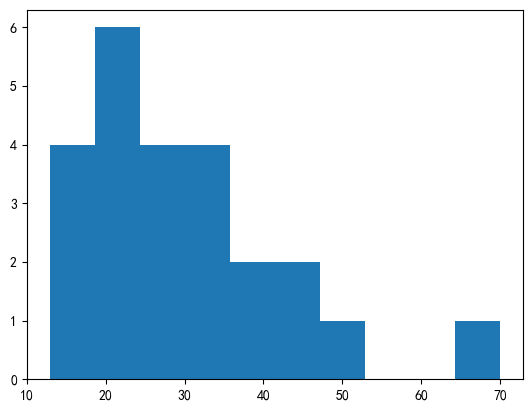

In [60]:
# 宽度为10的等宽直方图
import matplotlib.pyplot as plt
plt.hist(a, bins=10)
plt.xticks(np.arange(10, 80, 10))
plt.show()

In [61]:
# 计算age的信息熵
import pandas as pd
data = pd.read_csv('buy_computer.csv')
df = pd.DataFrame(data)
df = df.drop(['income','student','credit'], axis=1) # 删除列
print(df)

    count     age  buy
0      64   young   no
1      64   young   no
2     128  middle  yes
3      60     old  yes
4      64     old  yes
5      64     old   no
6      64  middle  yes
7     128   young   no
8      64   young  yes
9     132     old  yes
10     64   young  yes
11     32  middle  yes
12     32  middle  yes
13     63     old   no
14      1     old  yes


In [67]:
D1 = df[df['age'] == 'young']
print(D1)
print(D1.groupby('buy').sum('count'))
ent1 = -((128/(256+128))*np.log2(128/(256+128)) + (256/(256+128))*np.log2(256/(256+128)))
print(ent1)


    count    age  buy
0      64  young   no
1      64  young   no
7     128  young   no
8      64  young  yes
10     64  young  yes
     count
buy       
no     256
yes    128
0.9182958340544896


In [69]:
D2 = df[df['age'] == 'middle']
print(D2)
print(D2.groupby('buy').sum('count'))
ent2 = 0

    count     age  buy
2     128  middle  yes
6      64  middle  yes
11     32  middle  yes
12     32  middle  yes
     count
buy       
yes    256


In [68]:
D3 = df[df['age'] == 'old']
print(D3)
print(D3.groupby('buy').sum('count'))
ent3 = -((127/(127+257))*np.log2(127/(127+257)) + (+257/(127+257))*np.log2(+257/(127+257)))
print(ent3)

    count  age  buy
3      60  old  yes
4      64  old  yes
5      64  old   no
9     132  old  yes
13     63  old   no
14      1  old  yes
     count
buy       
no     127
yes    257
0.9156696247761256


In [70]:
# 计算年龄信息熵
ent=384/1024*ent1 + 256/1024*ent2 + 384/1024*ent3
print(ent)

0.6877370470614808
